# I. Zero shot classification


## Importing model and loading csv file

In [ ]:
# importing and loading the model
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
classifier = pipeline("zero-shot-classification",
                      model="knowledgator/comprehend_it-base")


In [ ]:
# loading the csv files of the scraped reviews into a dataframes
hostinger = pd.read_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/Hostinger.csv")
bluehost = pd.read_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/Bluehost.csv")

## Hostinger

In [ ]:
# predict the label of the reviews for Hostinger

# limit the number of reviews to predict for speed limitation
rev_hostinger = hostinger.Review
candidate_labels = ["performance or features", "customer support", "suspended or blocked", "price or payment"]

# predict the labels
question = ["What the customer is complaining about"]
results_hostinger = []

for i in rev_hostinger:
  result = classifier(f"{question} \n {i}", candidate_labels)
  results_hostinger.append(result)

In [ ]:
# loading the result of the reviews into a dataframe
label_results_hostinger = [i["labels"][0] for i in results_hostinger]
score_results_hostinger = [i["scores"][0] for i in results_hostinger]
rev_host_df = pd.DataFrame({"Review" : rev_hostinger, "Label" : label_results_hostinger, "Score" : score_results_hostinger})
rev_host_df.head()

,Review,Label,Score
0,I hate hostinger. I've been trying to log into...,price or payment,0.378352
1,I've been with Hostinger for many years and I ...,customer support,0.637881
2,I'm just not happy so far. The whole reason I ...,customer support,0.376981
3,I bought a domain name using this company. I w...,suspended or blocked,0.407073
4,"I disabled auto-renew, but they billed me anyway",price or payment,0.458177


In [ ]:
hostinger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    275 non-null    object
 1   Date      275 non-null    object
 2   Location  275 non-null    object
dtypes: object(3)
memory usage: 6.6+ KB


In [ ]:
rev_host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  275 non-null    object 
 1   Label   275 non-null    object 
 2   Score   275 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.6+ KB


## Bluehost

In [ ]:
# predict the label of the reviews of Bluehost

# limit the number of reviews to predict for speed limitation
rev_bluehost = bluehost.Review
candidate_labels = ["performance & features", "customer support", "suspended or blocked", "price & payment"]

# predict the labels
question = ["What is the main theme of the complain"]
results_bluehost = []

for i in rev_bluehost:
  result = classifier(f"{question} \n {i}", candidate_labels)
  results_bluehost.append(result)

In [ ]:
# loading the results of the reviews into a dataframe

label_results_bluehost = [i["labels"][0] for i in results_bluehost]
score_results_bluehost = [i["scores"][0] for i in results_bluehost]
rev_blue_df = pd.DataFrame({"Review" : rev_bluehost, "Label" : label_results_bluehost, "Score" : score_results_bluehost})
rev_blue_df.head()

,Review,Label,Score
0,I've been dealing with an ongoing email issue ...,customer support,0.609739
1,"Decent customer service, unfortunatly not resp...",customer support,0.768713
2,My website drops out almost daily sometime 5 m...,suspended or blocked,0.374405
3,Worst customer service. They do not even provi...,customer support,0.644647
4,Awful load speed due to terrible response time...,customer support,0.643956


In [ ]:
rev_blue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  279 non-null    object 
 1   Label   279 non-null    object 
 2   Score   279 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


## Saving the results into csv files

In [ ]:
# Saving the results into csv files
rev_host_df.to_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/rev_host_df.csv", index=False, header=True)
rev_blue_df.to_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/rev_blue_df.csv", index=False, header=True)

# II. Quality check

## Import package and loading dataframe

In [ ]:
# import packages and dataframes again in case we run this chapter without running the model again
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


In [ ]:
# loading the dataframe with the predictions and the original datafram with the reviews
rev_host_df = pd.read_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/rev_host_df.csv")
rev_blue_df = pd.read_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/rev_blue_df.csv")

hostinger = pd.read_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/Hostinger.csv")
bluehost = pd.read_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/Bluehost.csv")

## Distribution of the labels

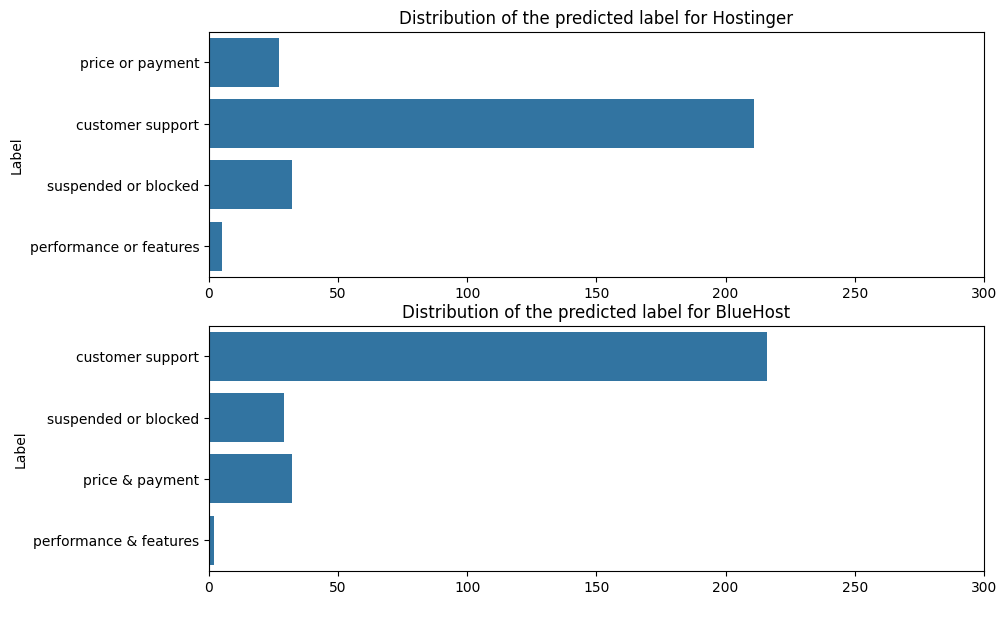

In [ ]:
# check the distribution of the predicted labels
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.title("Distribution of the predicted label for Hostinger")
plt.xlim([0,300])
plt.xlabel(" ")
sns.countplot(y= "Label", data =rev_host_df)
plt.subplot(212)
plt.title("Distribution of the predicted label for BlueHost")
plt.xlim([0,300])
plt.xlabel(" ")
sns.countplot(y= "Label", data =rev_blue_df);

## Distribution of the scores

<Figure size 1000x1000 with 0 Axes>

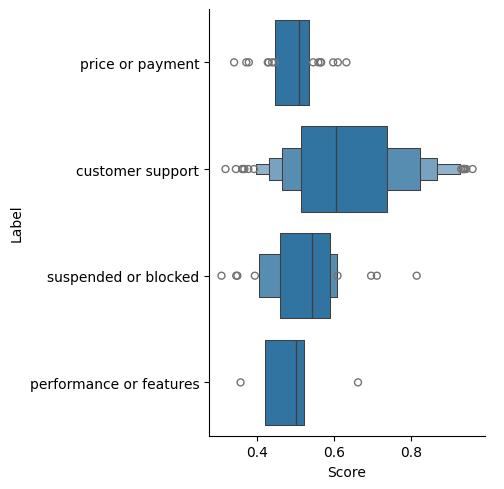

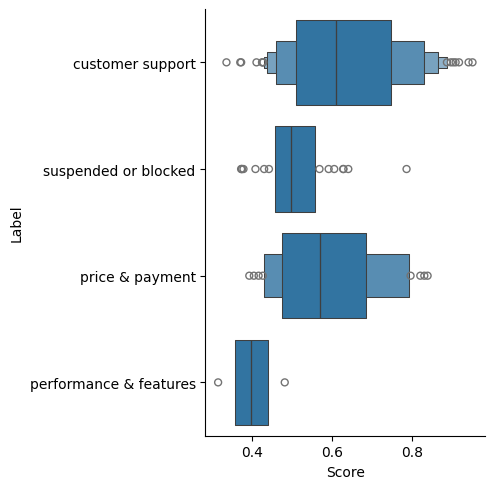

In [ ]:
# Checking distribution of the score of the predictions
plt.figure(figsize=(10,10))
sns.catplot(kind="boxen",y="Label", x="Score", data=rev_host_df)
sns.catplot(kind="boxen",y="Label", x="Score", data=rev_blue_df);

## Check manually the precision of the predictions

In [ ]:
# display a random reviews with the label and score predicted by the model for each company
print("Hostinger : ")
new_dfh = rev_host_df[rev_host_df["Label"] != "customer support"]
index = np.random.choice(new_dfh.index)
display(new_dfh.Review[index])
display(new_dfh.Label[index])
display(new_dfh.Score[index])

print("\nBluehost : ")
new_dfb = rev_blue_df[rev_blue_df["Label"] != "customer support"]
index = np.random.choice(new_dfb.index)
display(new_dfb.Review[index])
display(new_dfb.Label[index])
display(new_dfb.Score[index])

Hostinger : 


'Bait and switch pricing. False advertising with hidden terms. Outrageous renewal pricing.\nLet the buyer beware should be your mantra if dealing with Hostinger.\n\nIn reply to the below:\nYou advertise a price for hosting for $43.xx per year without mention of the renewal price for the second year being $143.xx.\n\nA "transparent" advert would be:\n"Hosting: $43.xx for the first year - with a renewal price of $143.xx"\nHostinger doesn\'t make renewal prices visible in the initial adverts - for hosting or domain names.\n\nThis is NOT transparent. It is intentionally misleading.\n\nNote to Trustpilot:\nHostinger is requesting my personal account information and I am refusing to provide it for fear of retaliation. They could make unlocking my domain names difficult or cause any number of problems for me with my Hostinger account. Basically, I do not trust them at all, in any way.\n\nI have already discussed my problems with Hostinger and they have failed to understand my point of view on

'price or payment'

0.5644645690917969


Bluehost : 


'Fraudulently Charged. They charged me a year ago for services that I did not want. I called and cancelled my account and autopay. This year, they charged me $360, saying that I never cancelled the autopay and they cannot refund me as it is within their policy that I was supposed to cancel autopay (which I did). If they have any access to your financial accounts, they will abuse them. I have been reading online and this is a common occurrence, where they will take your money and refuse to refund you.'

'price & payment'

0.831447422504425

# III. Pre-processing

## Merging prediction with the date and location

In [ ]:
# merging the original datafram with the reviews the date and location with
# the datafram with the label predicted by the model

dfh = hostinger.merge(rev_host_df, left_on="Review", right_on = "Review")
dfb = bluehost.merge(rev_blue_df, left_on="Review", right_on = "Review")
dfh.head()

,Review,Date,Location,Label,Score
0,I hate hostinger. I've been trying to log into...,"August 31, 2024",GB,price or payment,0.378352
1,I've been with Hostinger for many years and I ...,"August 31, 2024",GB,customer support,0.637881
2,I'm just not happy so far. The whole reason I ...,"August 30, 2024",US,customer support,0.376981
3,I bought a domain name using this company. I w...,"August 30, 2024",GB,suspended or blocked,0.407073
4,"I disabled auto-renew, but they billed me anyway","August 29, 2024",MA,price or payment,0.458177


## Converting the Date column in datetime format

In [ ]:
# converting the Date column in datetime format
dfh["Date"] = dfh["Date"].apply(lambda x : pd.to_datetime(x))
dfb["Date"] = dfb["Date"].apply(lambda x : pd.to_datetime(x))

In [ ]:
dfh.head()

,Review,Date,Location,Label,Score
0,I hate hostinger. I've been trying to log into...,2024-08-31,GB,price or payment,0.378352
1,I've been with Hostinger for many years and I ...,2024-08-31,GB,customer support,0.637881
2,I'm just not happy so far. The whole reason I ...,2024-08-30,US,customer support,0.376981
3,I bought a domain name using this company. I w...,2024-08-30,GB,suspended or blocked,0.407073
4,"I disabled auto-renew, but they billed me anyway",2024-08-29,MA,price or payment,0.458177


## Cleaning the "Location" column

In [ ]:
dfh.Location.value_counts()

,count
Location,
GB,47
US,43
IN,33
PK,12
CA,10
...,...
CR,1
IL,1
MK,1


In [ ]:
import json
# A lot of location have a fue appearance so we will regroup them by continent
main_location = ["US", "IN", "GB", "PK"]

# I will use a JSON file containing all the country code in 2 letters par continent

# Opening JSON file
with open('/content/drive/MyDrive/DA_Portfolio/WebScrapping/country_codes.json') as json_file:
    country_code = json.load(json_file)
json_file.close()

# looping all the continent of the json file and check if the country code is a value of the continent
def clean_location(code):
  for continent in country_code:
    if code.lower() in country_code[continent].keys():
      return str(continent).capitalize()



dfh["Continent"] = dfh["Location"].apply(clean_location)
dfb["Continent"] = dfb["Location"].apply(clean_location)


In [ ]:
# the cleaning have create 5 null values
display(dfh.isna().sum())
display(dfb.isna().sum())

,0
Review,0
Date,0
Location,0
Label,0
Score,0
Continent,1


,0
Review,0
Date,0
Location,0
Label,0
Score,0
Continent,1


In [ ]:
display(dfh[dfh["Continent"].isnull()])
display(dfb[dfb["Continent"].isnull()])

,Review,Date,Location,Label,Score,Continent
101,"I joined Hostinger on July 22nd, 2023.\nThen I...",2024-07-22,RS,customer support,0.54931,None


,Review,Date,Location,Label,Score,Continent
161,The Bluehost migration team didn't complete th...,2024-05-01,RS,customer support,0.59842,None


In [ ]:
# Replace the nan value by the correct continent
# the code RS is not in the json file but the code stand for Serbia

dfh.loc[101, "Continent"] = "Europe"
dfb.loc[161, "Continent"] = "Europe"

# There is no country for the code XK so we delete the row
dfb.dropna(inplace=True)

In [ ]:
display(dfh.Continent.value_counts())
display(dfb.Continent.value_counts())

,count
Continent,
Europe,95
Asia,71
North america,59
Africa,26
South america,16
Middle east,7
Oceania,1


,count
Continent,
North america,147
Europe,67
Africa,18
Asia,16
Oceania,15
Middle east,9
South america,7


## Adding a column for the company name


In [ ]:
dfh["Company"] = "Hostinger"
dfh.head()

,Review,Date,Location,Label,Score,Continent,Company
0,I hate hostinger. I've been trying to log into...,2024-08-31,GB,price or payment,0.378352,Europe,Hostinger
1,I've been with Hostinger for many years and I ...,2024-08-31,GB,customer support,0.637881,Europe,Hostinger
2,I'm just not happy so far. The whole reason I ...,2024-08-30,US,customer support,0.376981,North america,Hostinger
3,I bought a domain name using this company. I w...,2024-08-30,GB,suspended or blocked,0.407073,Europe,Hostinger
4,"I disabled auto-renew, but they billed me anyway",2024-08-29,MA,price or payment,0.458177,Africa,Hostinger


In [ ]:
dfb["Company"] = "Bluehost"

## Concatenat both dataframe into one

In [ ]:
# Concatenat both dataframe into one
df = pd.concat([dfh, dfb])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Review     554 non-null    object        
 1   Date       554 non-null    datetime64[ns]
 2   Location   554 non-null    object        
 3   Label      554 non-null    object        
 4   Score      554 non-null    float64       
 5   Continent  554 non-null    object        
 6   Company    554 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 34.6+ KB


In [ ]:
df.to_csv("/content/drive/MyDrive/DA_Portfolio/WebScrapping/reviews_hostinger_bluehost.csv", index=False, header=True)

In [ ]:
df.head()

,Review,Date,Location,Label,Score,Continent,Company
0,I hate hostinger. I've been trying to log into...,2024-08-31,GB,price or payment,0.378352,Europe,Hostinger
1,I've been with Hostinger for many years and I ...,2024-08-31,GB,customer support,0.637881,Europe,Hostinger
2,I'm just not happy so far. The whole reason I ...,2024-08-30,US,customer support,0.376981,North america,Hostinger
3,I bought a domain name using this company. I w...,2024-08-30,GB,suspended or blocked,0.407073,Europe,Hostinger
4,"I disabled auto-renew, but they billed me anyway",2024-08-29,MA,price or payment,0.458177,Africa,Hostinger


# IV. Report

In [ ]:
df = pd.concat([dfh, dfb])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Review     554 non-null    object        
 1   Date       554 non-null    datetime64[ns]
 2   Location   554 non-null    object        
 3   Label      554 non-null    object        
 4   Score      554 non-null    float64       
 5   Continent  554 non-null    object        
 6   Company    554 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 34.6+ KB


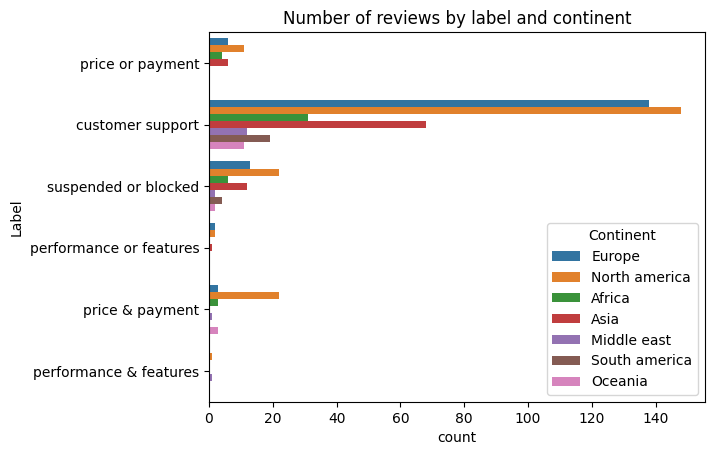

In [ ]:
sns.countplot(y = "Label", hue = "Continent", data = df)
plt.title("Number of reviews by label and continent");

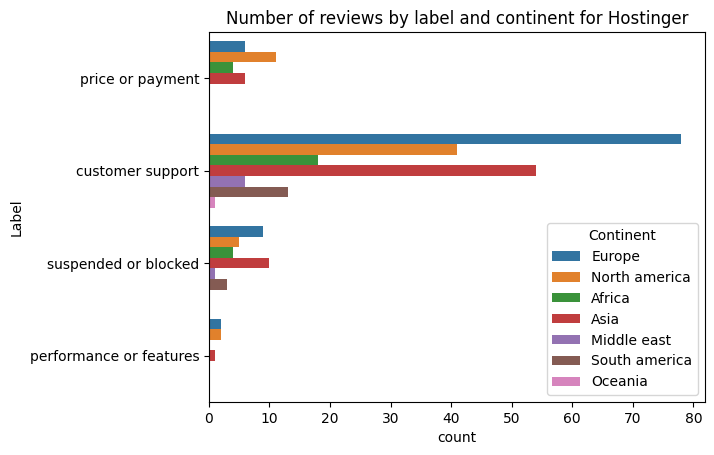

In [ ]:
sns.countplot(y = "Label", hue = "Continent", data = dfh)
plt.title("Number of reviews by label and continent for Hostinger");



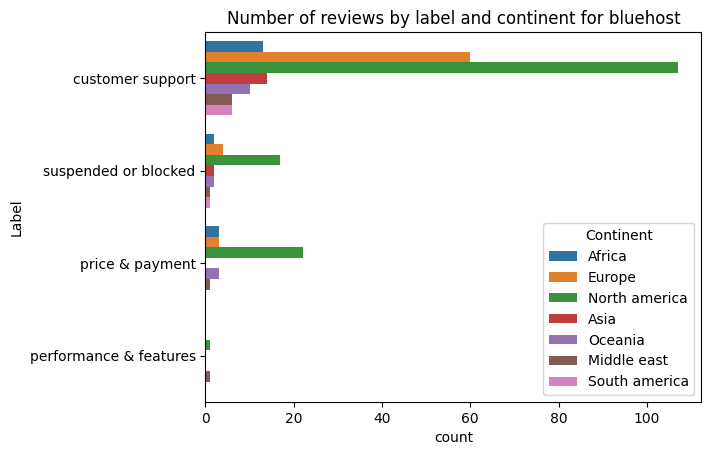

In [ ]:
sns.countplot(y = "Label", hue = "Continent", data = dfb)
plt.title("Number of reviews by label and continent for bluehost");

## Limitation
**The low computation power** don't allow me to run the model on thousands of reviews. Wich decrease the relevance of the analysis. Moreover the long time the model take to run does'nt allow me to properly check the performance of the classification

**The Truspilot website** we use is actually the USA version. So the distribution of the location is biaised

## Recomendation


*   Use premium cloud computing to run the model
*   Scrapp a website that does'nt have a version for each country by using anti-bot detection methode



